In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA

In [2]:
pd.options.mode.chained_assignment = None

In [3]:
# irdata = pd.read_csv('./data/iris.data', header=None)
iris = datasets.load_iris()
data = iris.data
target = iris.target
target_names = iris.target_names

preprocessed_data = data.copy()

In [4]:
def encode_on_hypercube(data):
    """
    Метод для кодирования на гиперкуб
    
    :param data: DataFrame instance
    return DataFrame instance
    """
    def encode_by_column(column):
        minimum, maximum = np.min(column), np.max(column)
        return np.apply_along_axis(lambda x: 2 * (x - minimum) / (maximum - minimum) - 1, 0, column)
    
    return np.apply_along_axis(encode_by_column, 0, data)

In [5]:
def get_means(data):
    """
    Метод для получения среднего по столбцам
    """
    return np.mean(data, axis=0)

In [6]:
def center(data):
    means = get_means(data)
    assert means.shape == (4,)
    
    for index, column in enumerate(data.T):
        column -= means[index]
    return data

In [7]:
def generate_weights(height, width, start, end):
    return np.random.uniform(start, end, (height, width))

In [8]:
def normilize(weights):
    return np.sum(weights**2) ** (1./2)

In [9]:
def MyPCA(copied_data):
    data = copied_data.copy()
    records_count, attributes_count = data.shape
    
    weights = generate_weights(attributes_count, attributes_count, -1, 1)

    assert weights.shape == (attributes_count, attributes_count)
    
    results = np.zeros((attributes_count, records_count))
    
    for number, row_weights in enumerate(weights.T):
        row_weights /= normilize(row_weights)
        
        for epoch in range(10 ** (number + 1)):
            
            for record_number, row_result in enumerate(results.T):
                row_result[number] = row_weights.dot(data[record_number])

                row_weights += (row_result[number] 
                                * (data[record_number] - row_result[number] * row_weights) / records_count)
                row_weights /= normilize(row_weights)
        
        data -= results[number].reshape((records_count, 1)).dot(weights[:, number].reshape((1, attributes_count)))
    
    return results.T, weights            

In [10]:
preprocessed_data = encode_on_hypercube(preprocessed_data)
preprocessed_data

array([[-5.55555556e-01,  2.50000000e-01, -8.64406780e-01,
        -9.16666667e-01],
       [-6.66666667e-01, -1.66666667e-01, -8.64406780e-01,
        -9.16666667e-01],
       [-7.77777778e-01,  0.00000000e+00, -8.98305085e-01,
        -9.16666667e-01],
       [-8.33333333e-01, -8.33333333e-02, -8.30508475e-01,
        -9.16666667e-01],
       [-6.11111111e-01,  3.33333333e-01, -8.64406780e-01,
        -9.16666667e-01],
       [-3.88888889e-01,  5.83333333e-01, -7.62711864e-01,
        -7.50000000e-01],
       [-8.33333333e-01,  1.66666667e-01, -8.64406780e-01,
        -8.33333333e-01],
       [-6.11111111e-01,  1.66666667e-01, -8.30508475e-01,
        -9.16666667e-01],
       [-9.44444444e-01, -2.50000000e-01, -8.64406780e-01,
        -9.16666667e-01],
       [-6.66666667e-01, -8.33333333e-02, -8.30508475e-01,
        -1.00000000e+00],
       [-3.88888889e-01,  4.16666667e-01, -8.30508475e-01,
        -9.16666667e-01],
       [-7.22222222e-01,  1.66666667e-01, -7.96610169e-01,
      

In [11]:
preprocessed_data = center(preprocessed_data)
preprocessed_data

array([[-4.12962963e-01,  3.68888889e-01, -7.99322034e-01,
        -8.32777778e-01],
       [-5.24074074e-01, -4.77777778e-02, -7.99322034e-01,
        -8.32777778e-01],
       [-6.35185185e-01,  1.18888889e-01, -8.33220339e-01,
        -8.32777778e-01],
       [-6.90740741e-01,  3.55555556e-02, -7.65423729e-01,
        -8.32777778e-01],
       [-4.68518519e-01,  4.52222222e-01, -7.99322034e-01,
        -8.32777778e-01],
       [-2.46296296e-01,  7.02222222e-01, -6.97627119e-01,
        -6.66111111e-01],
       [-6.90740741e-01,  2.85555556e-01, -7.99322034e-01,
        -7.49444444e-01],
       [-4.68518519e-01,  2.85555556e-01, -7.65423729e-01,
        -8.32777778e-01],
       [-8.01851852e-01, -1.31111111e-01, -7.99322034e-01,
        -8.32777778e-01],
       [-5.24074074e-01,  3.55555556e-02, -7.65423729e-01,
        -9.16111111e-01],
       [-2.46296296e-01,  5.35555556e-01, -7.65423729e-01,
        -8.32777778e-01],
       [-5.79629630e-01,  2.85555556e-01, -7.31525424e-01,
      

In [12]:
start_time = time.time()

components, weights = MyPCA(preprocessed_data)

end_time = time.time()
diff = end_time - start_time
print(diff)

52.290916204452515


In [13]:
components.dot(weights.T)

array([[-0.40956096,  0.36765175, -0.79449022, -0.82761933],
       [-0.52701887, -0.04653999, -0.8035144 , -0.83718061],
       [-0.63602054,  0.1191823 , -0.83437491, -0.83399359],
       [-0.69285993,  0.03628523, -0.76843323, -0.83601003],
       [-0.46378116,  0.45040089, -0.79258153, -0.82562046],
       [-0.23764901,  0.69893965, -0.68530955, -0.65300234],
       [-0.68930237,  0.28490253, -0.79723399, -0.74724653],
       [-0.46677657,  0.284905  , -0.76295943, -0.83016174],
       [-0.80573701, -0.12969939, -0.8048293 , -0.83865046],
       [-0.52559867,  0.03619349, -0.76764515, -0.91848105],
       [-0.24045537,  0.53343385, -0.75714815, -0.82395549],
       [-0.57802674,  0.28484505, -0.7292563 , -0.8304213 ],
       [-0.58218021, -0.04672639, -0.80299505, -0.92000768],
       [-0.86068898, -0.04662844, -0.90563979, -0.92104156],
       [-0.01424367,  0.78211709, -0.85318333, -0.81785359],
       [-0.06797683,  1.11441234, -0.74877595, -0.64838455],
       [-0.24169829,  0.

In [14]:
pca = PCA(n_components=4)
X_r = pca.fit(data).transform(data)

X_r

array([[-2.68412563e+00,  3.19397247e-01, -2.79148276e-02,
        -2.26243707e-03],
       [-2.71414169e+00, -1.77001225e-01, -2.10464272e-01,
        -9.90265503e-02],
       [-2.88899057e+00, -1.44949426e-01,  1.79002563e-02,
        -1.99683897e-02],
       [-2.74534286e+00, -3.18298979e-01,  3.15593736e-02,
         7.55758166e-02],
       [-2.72871654e+00,  3.26754513e-01,  9.00792406e-02,
         6.12585926e-02],
       [-2.28085963e+00,  7.41330449e-01,  1.68677658e-01,
         2.42008576e-02],
       [-2.82053775e+00, -8.94613845e-02,  2.57892158e-01,
         4.81431065e-02],
       [-2.62614497e+00,  1.63384960e-01, -2.18793179e-02,
         4.52978706e-02],
       [-2.88638273e+00, -5.78311754e-01,  2.07595703e-02,
         2.67447358e-02],
       [-2.67275580e+00, -1.13774246e-01, -1.97632725e-01,
         5.62954013e-02],
       [-2.50694709e+00,  6.45068899e-01, -7.53180094e-02,
         1.50199245e-02],
       [-2.61275523e+00,  1.47299392e-02,  1.02150260e-01,
      

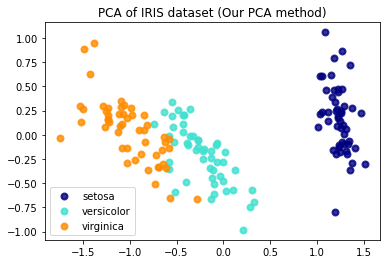

In [15]:
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(components[target == i, 0], components[target == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset (Our PCA method)')
plt.show()

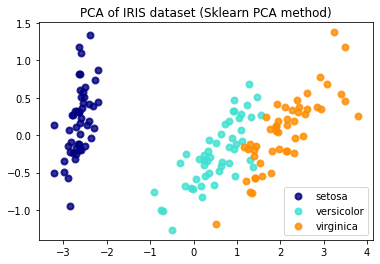

In [16]:
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[target == i, 0], X_r[target == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset (Sklearn PCA method)')
plt.show()